# GMM - Gaussian Mixture Model 
### Gaussian Mixture Models assume that each observation in a data set comes from a Gaussian Distribution with different mean and variance. By fitting the data to Gaussian Mixture Model, we aim to estimate the parameters of the gaussian distribution using the data.
source: https://cmdlinetips.com/2021/03/gaussian-mixture-models-with-scikit-learn-in-python/

source: https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.gmm

### Arguments that work with GMM algorithm:
1. n_components
2. covariance_type
3. tol
4. reg_covar
5. max_iter
6. n_init
7. init_params
8. contamination
9. weights_init
10. means_init
11. precisions_init
12. random_state
13. warm_start

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.insert(0,'../../../..')
import omama as O
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
imgs = O.DataHelper.get2D(N = 100, config_num=5, randomize=True, timing=True)
downsampled_imgs = O.Normalize.downsample(imgs, output_shape=(64, 64), flatten=True, timing=True)

get2D                    ...took   245.553199 seconds
image downsampling       ...took     7.469807 seconds
image downsampling       ...took    11.711728 seconds
image downsampling       ...took    13.910636 seconds
image downsampling       ...took    16.750770 seconds
image downsampling       ...took    22.674565 seconds
image downsampling       ...took    38.765575 seconds
image downsampling       ...took    40.997113 seconds
image downsampling       ...took    57.567616 seconds
image downsampling       ...took    64.708755 seconds
image downsampling       ...took    67.754093 seconds
image downsampling       ...took    73.396947 seconds
image downsampling       ...took    77.090643 seconds
image downsampling       ...took    81.332462 seconds
image downsampling       ...took    85.579101 seconds
image downsampling       ...took    87.470369 seconds
image downsampling       ...took    89.366373 seconds
image downsampling       ...took    93.874079 seconds
image downsampling       ...

(64, 64)


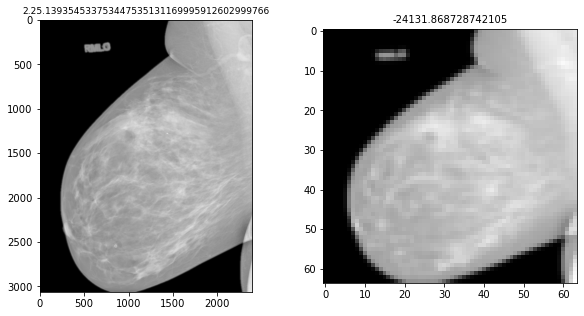

(64, 64)


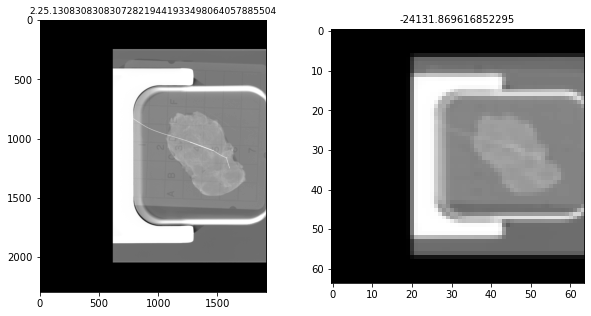

(64, 64)


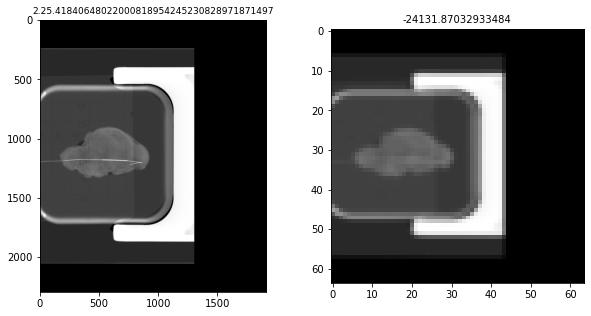

(64, 64)


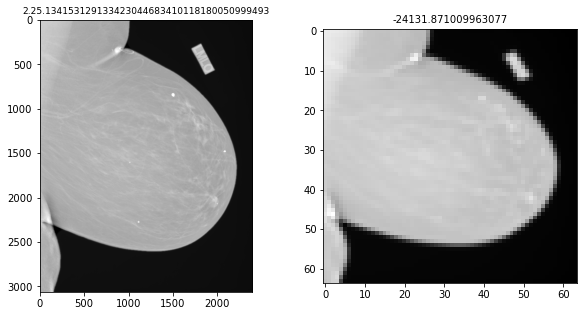

(64, 64)


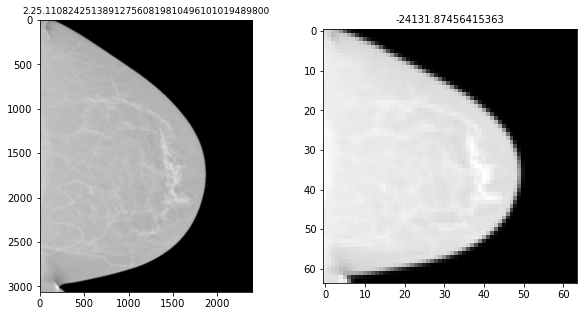

(64, 64)


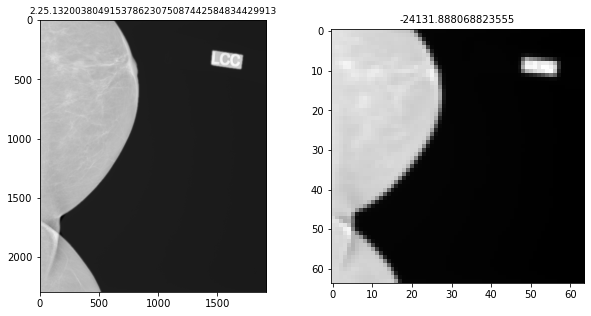

(64, 64)


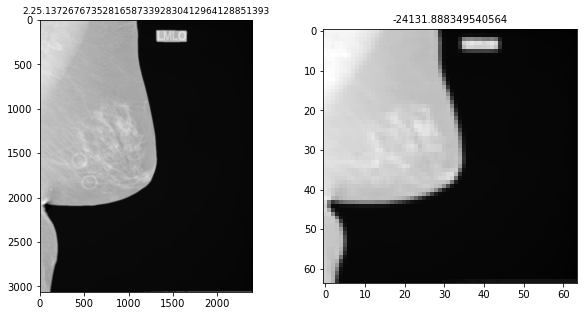

(64, 64)


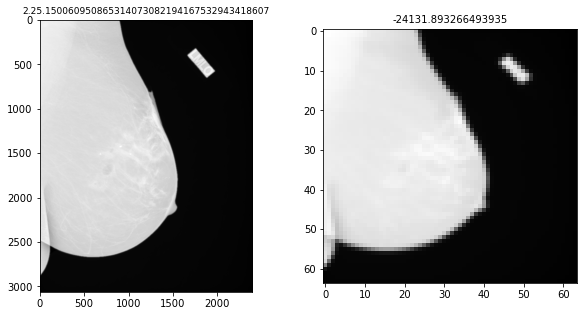

(64, 64)


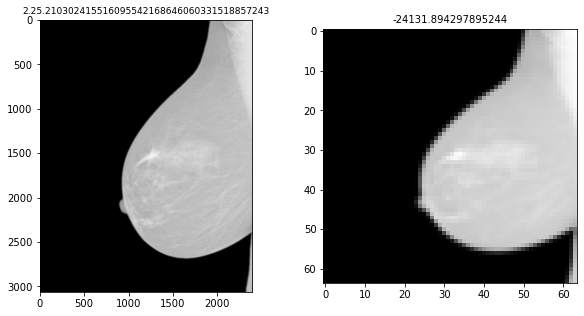

(64, 64)


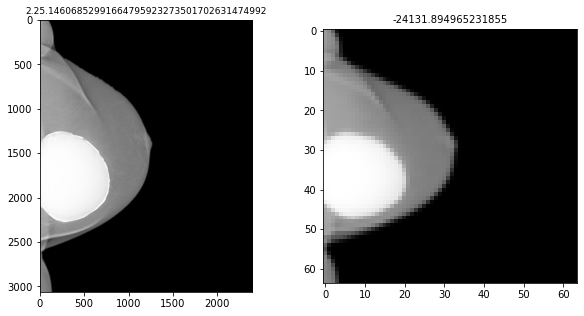

(64, 64)


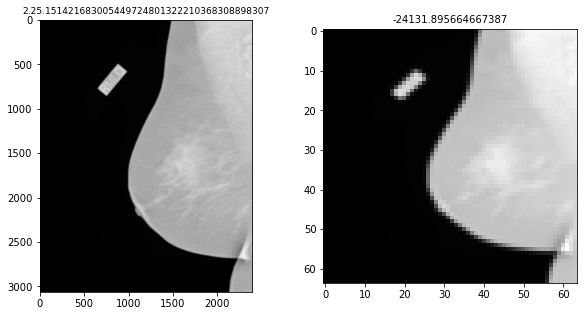

(64, 64)


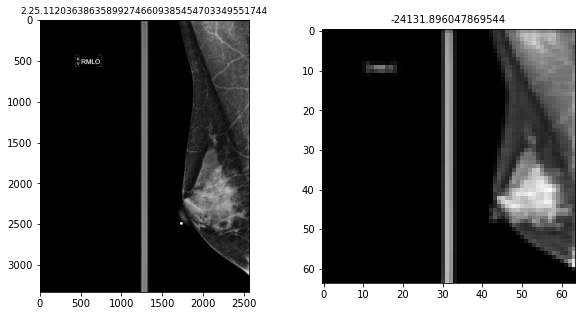

(64, 64)


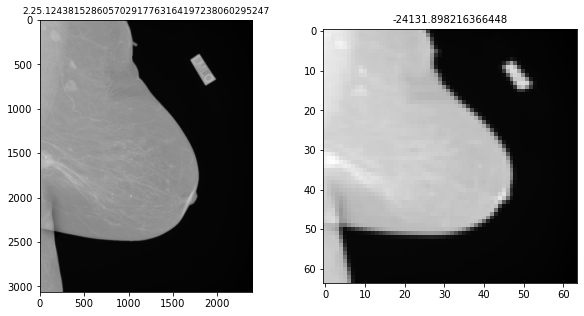

(64, 64)


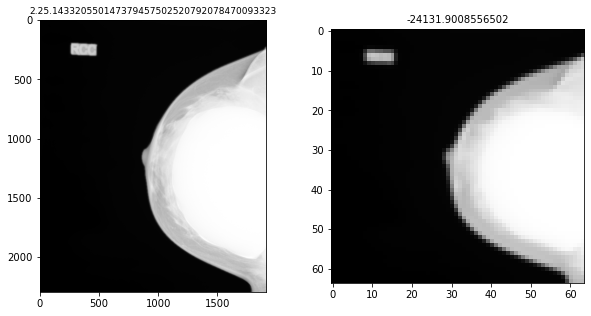

(64, 64)


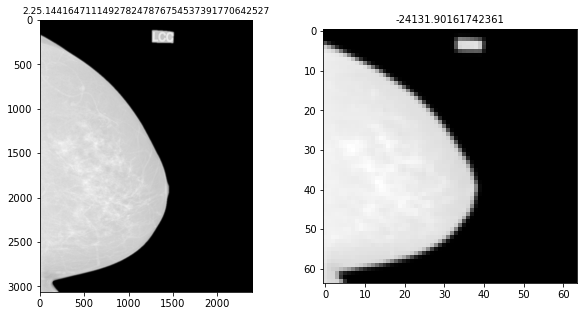

(64, 64)


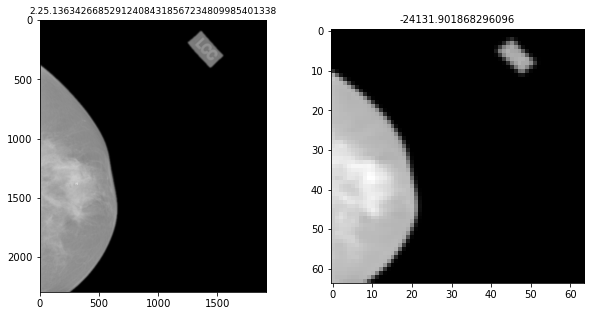

(64, 64)


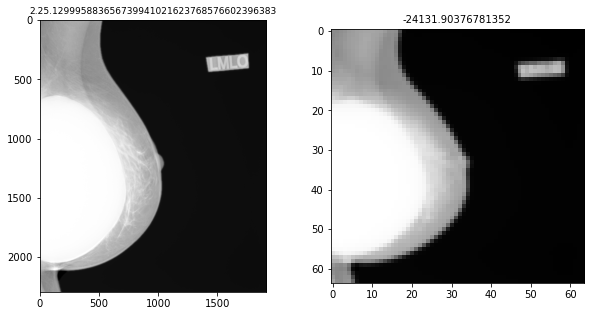

(64, 64)


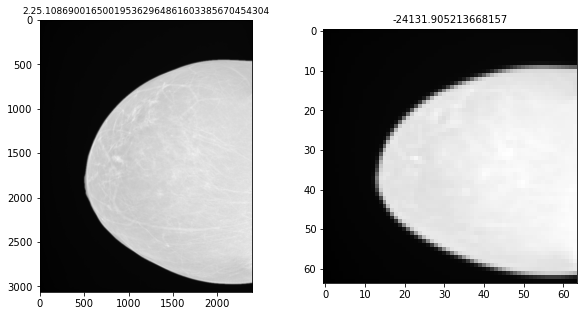

(64, 64)


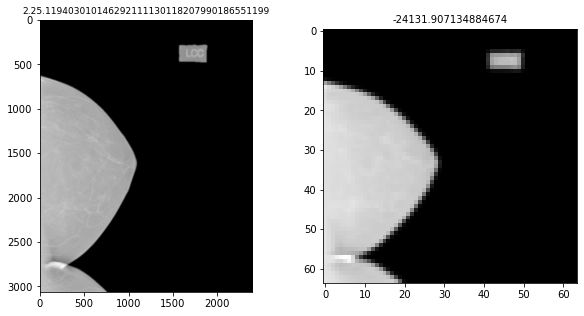

(64, 64)


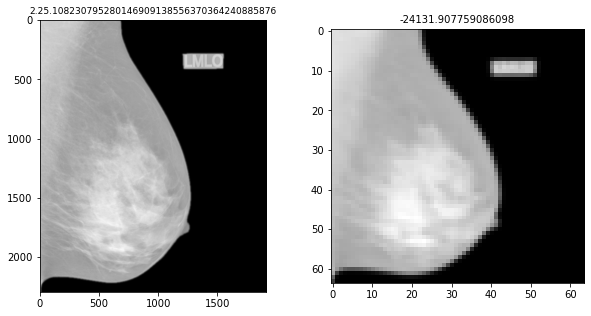

(64, 64)


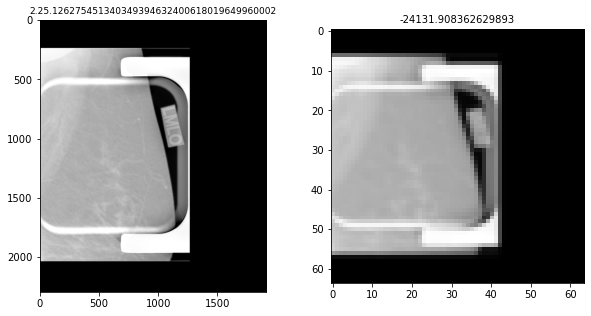

(64, 64)


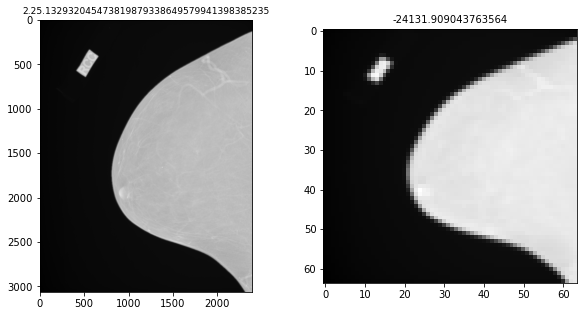

(64, 64)


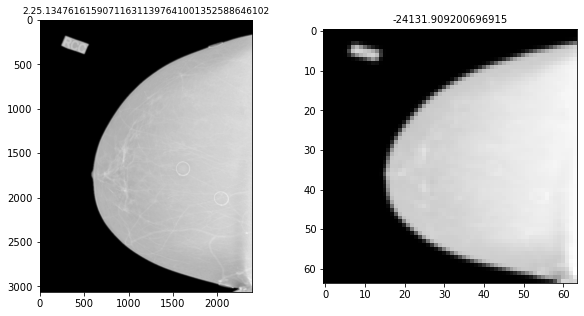

(64, 64)


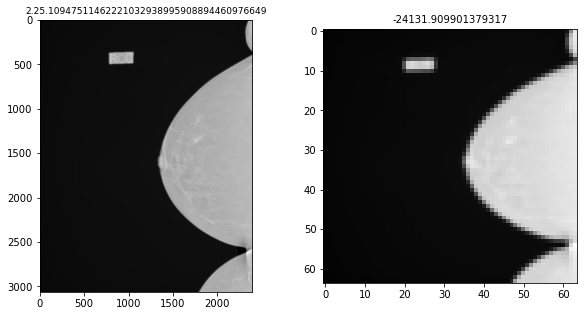

(64, 64)


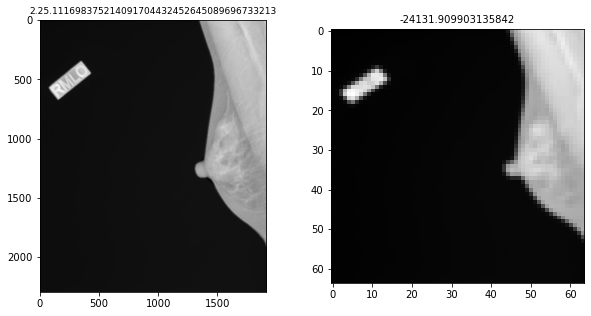

(64, 64)


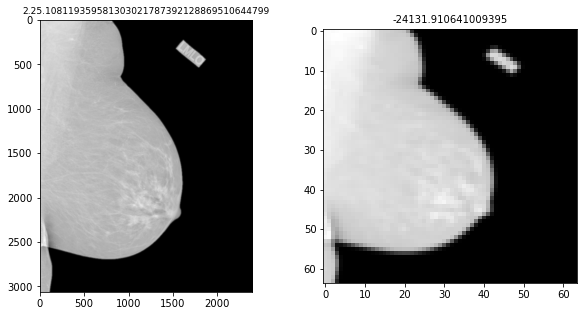

(64, 64)


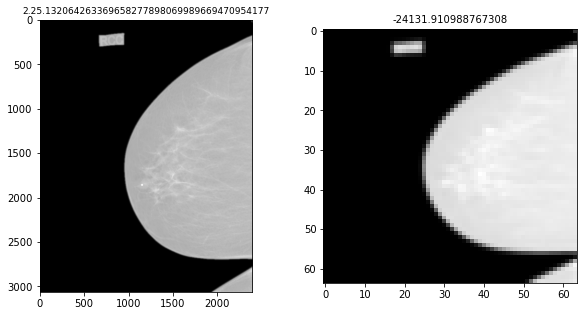

(64, 64)


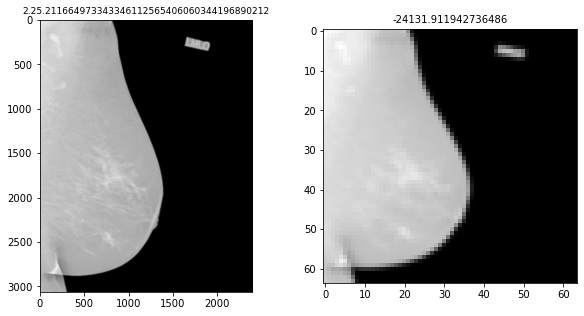

(64, 64)


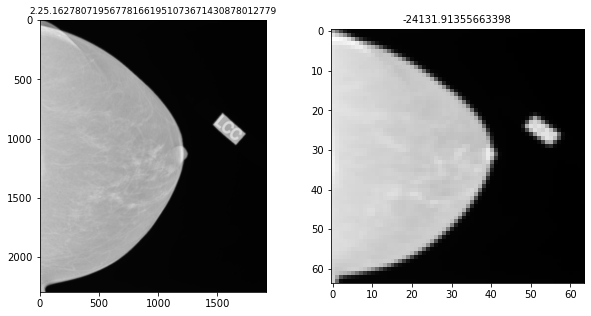

(64, 64)


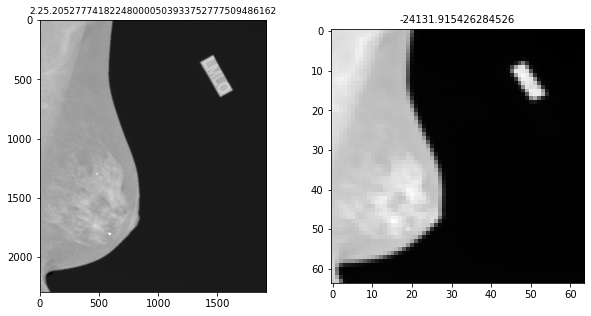

(64, 64)


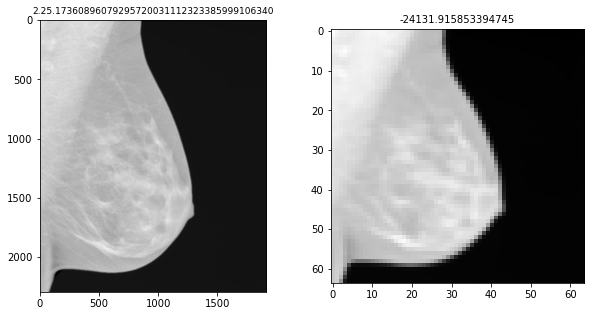

(64, 64)


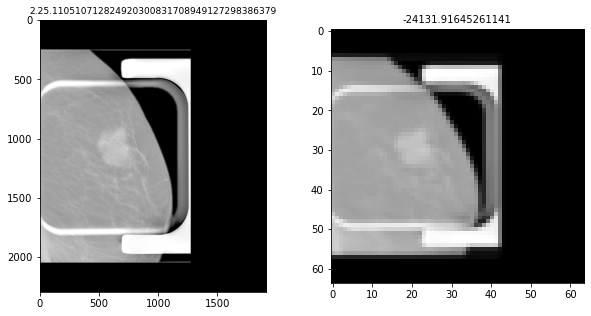

(64, 64)


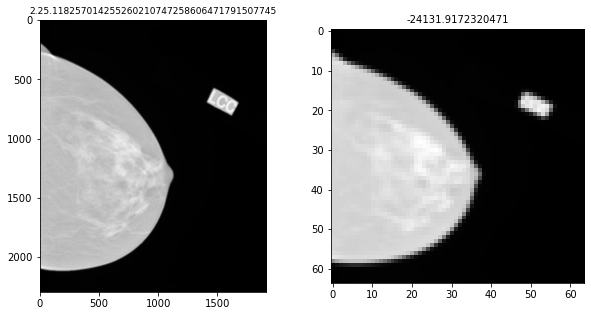

(64, 64)


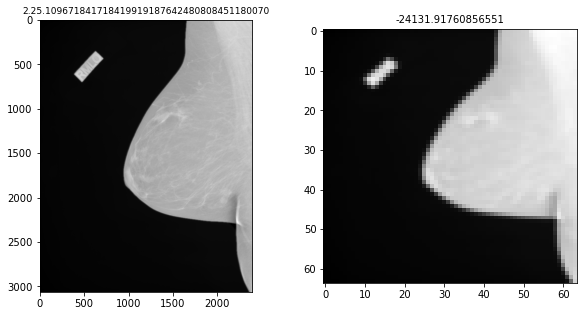

(64, 64)


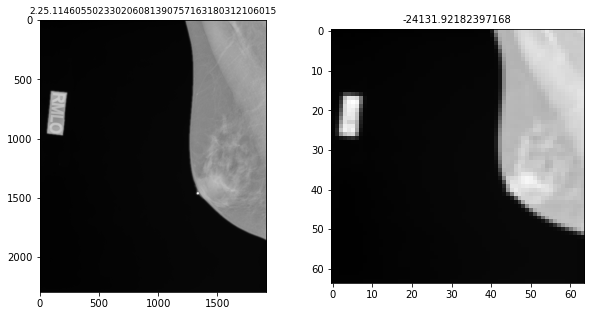

(64, 64)


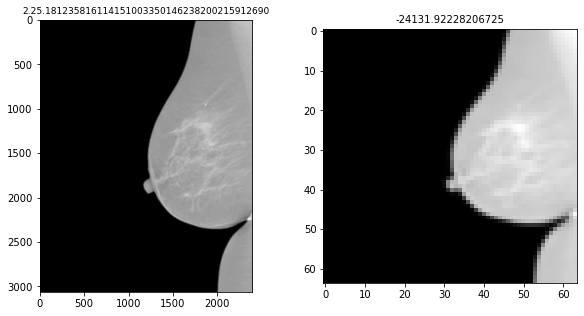

(64, 64)


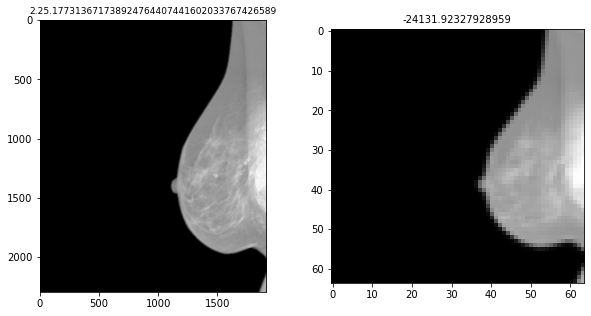

(64, 64)


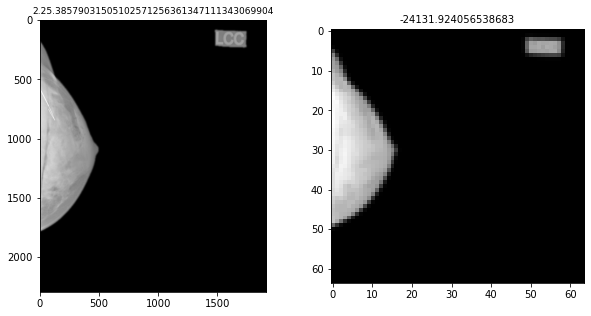

(64, 64)


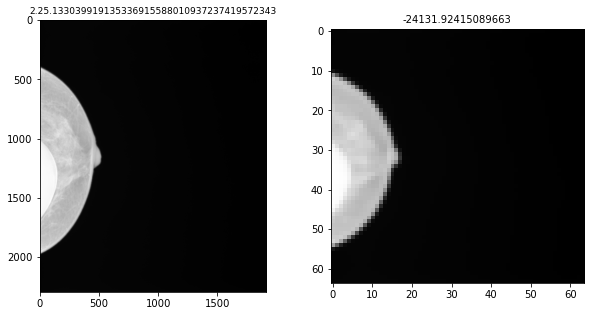

(64, 64)


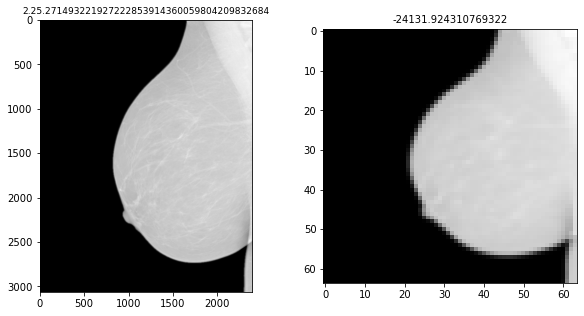

(64, 64)


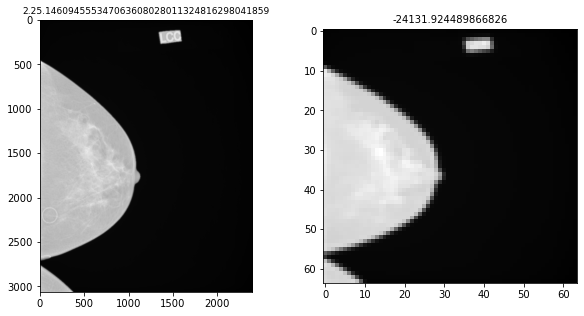

(64, 64)


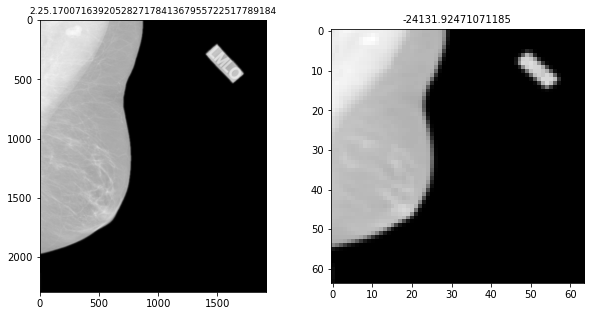

(64, 64)


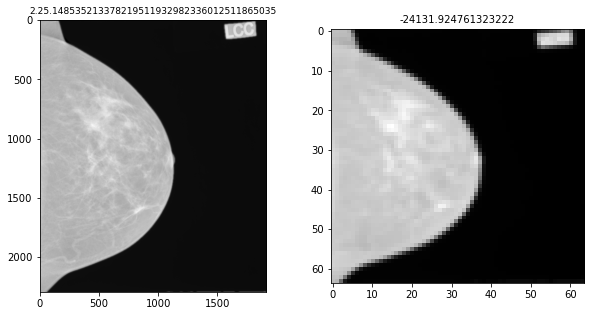

(64, 64)


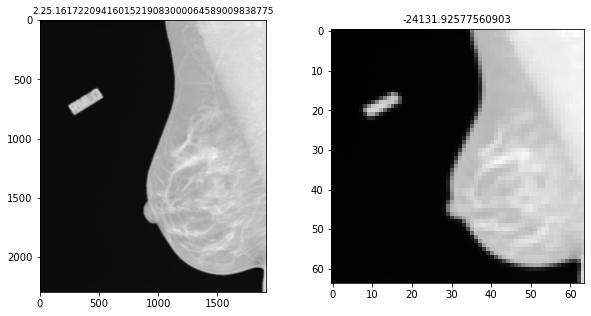

(64, 64)


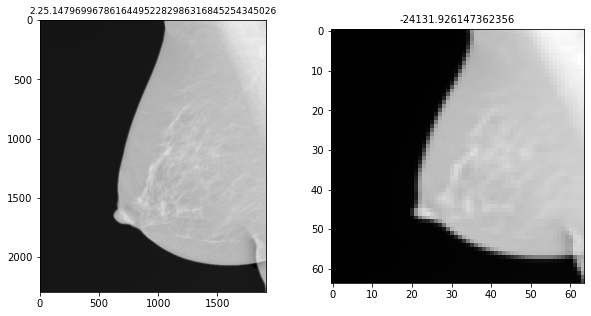

(64, 64)


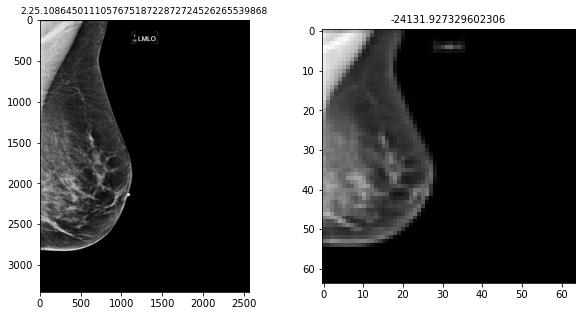

(64, 64)


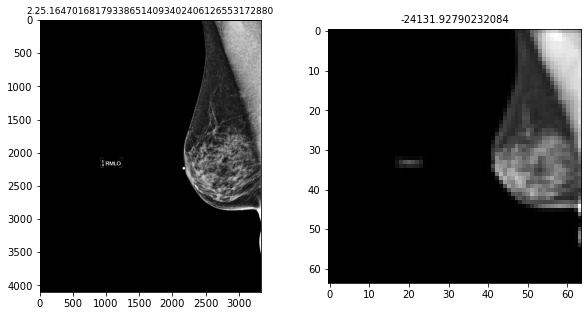

(64, 64)


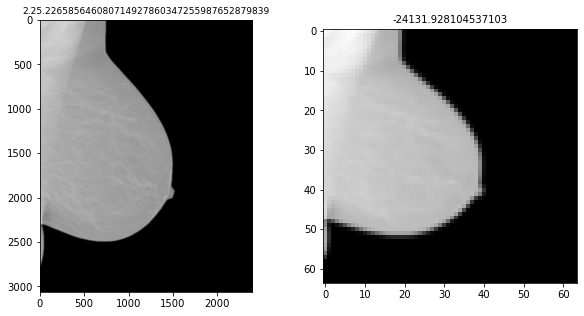

(64, 64)


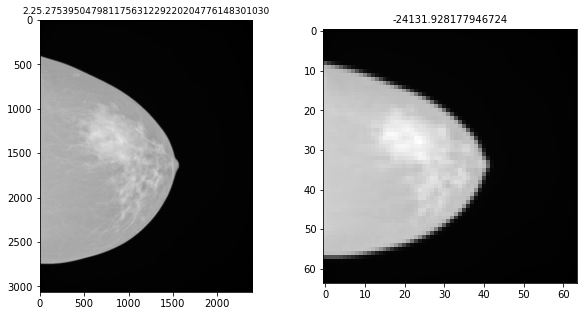

(64, 64)


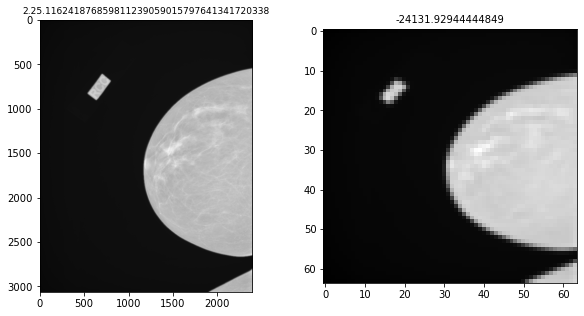

(64, 64)


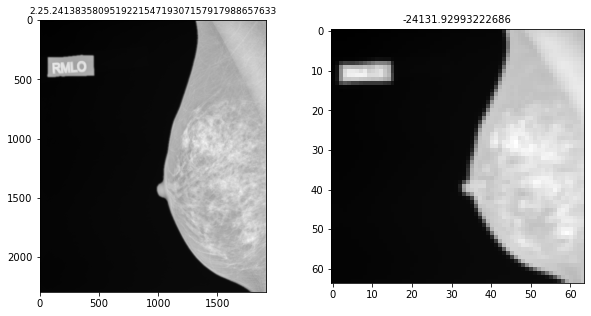

(64, 64)


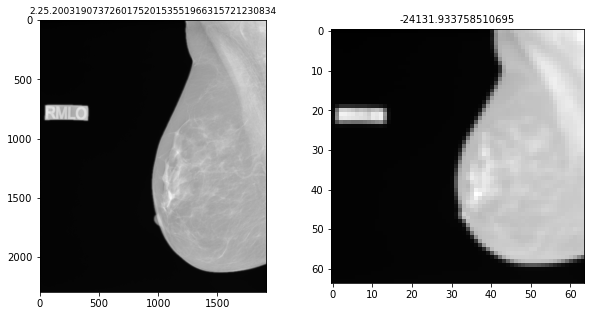

(64, 64)


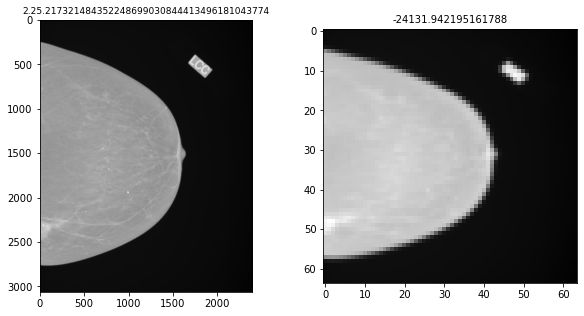

(64, 64)


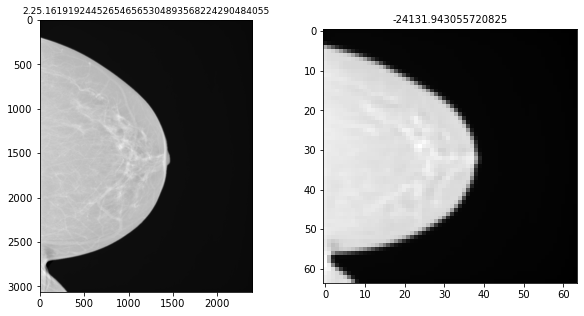

(64, 64)


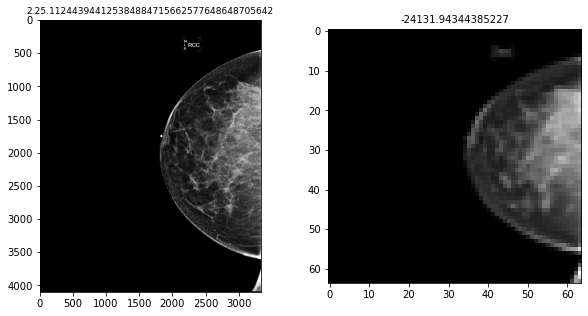

(64, 64)


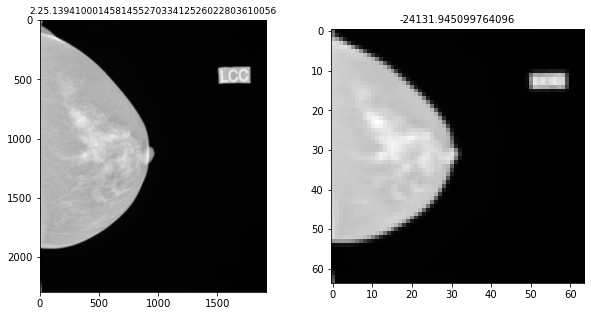

(64, 64)


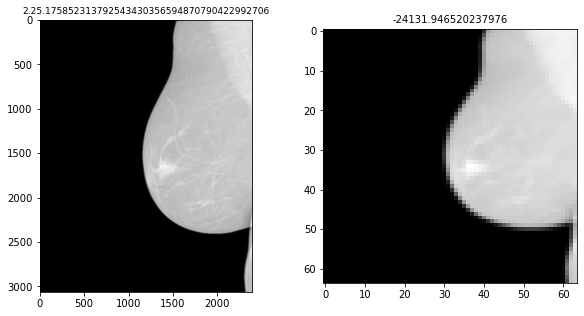

(64, 64)


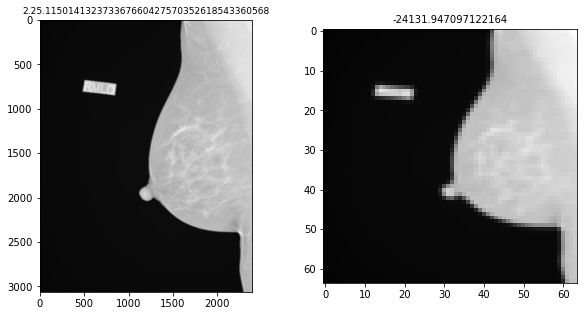

(64, 64)


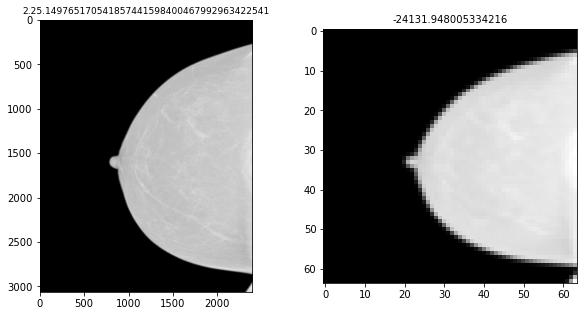

(64, 64)


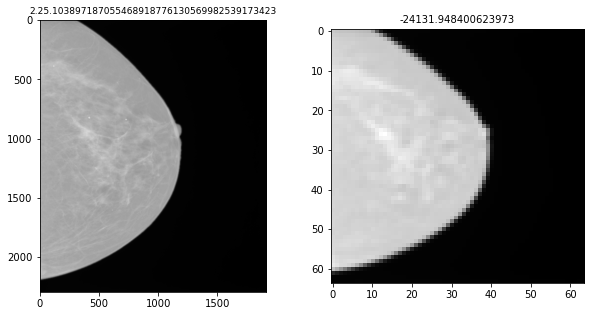

(64, 64)


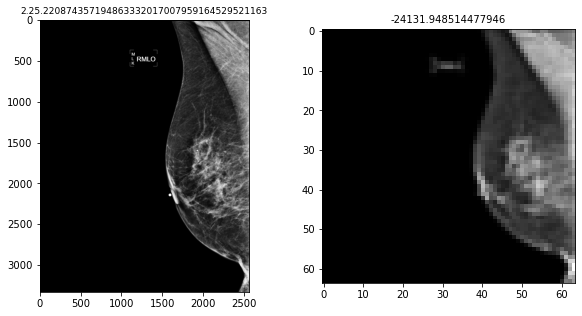

(64, 64)


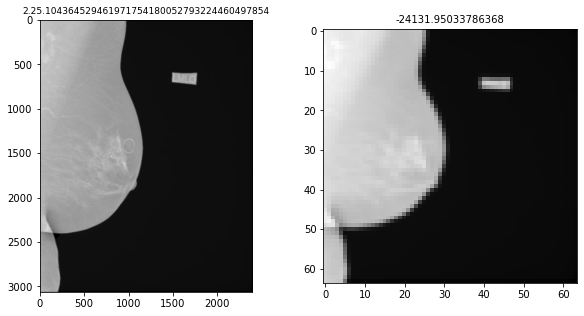

(64, 64)


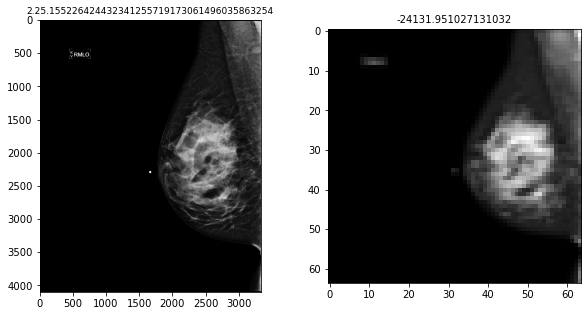

(64, 64)


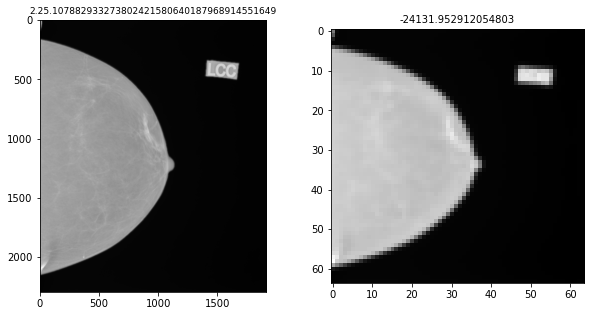

(64, 64)


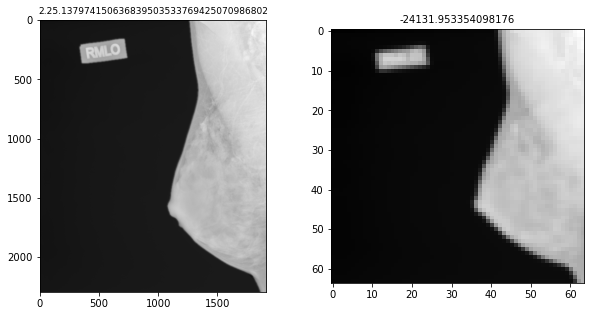

(64, 64)


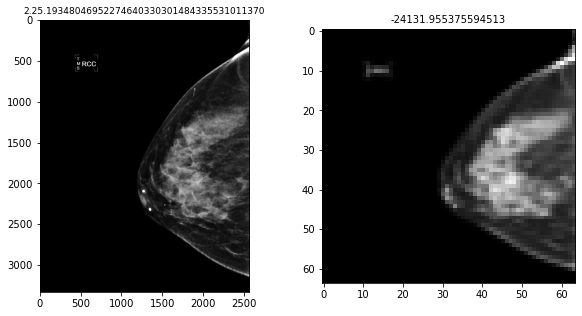

(64, 64)


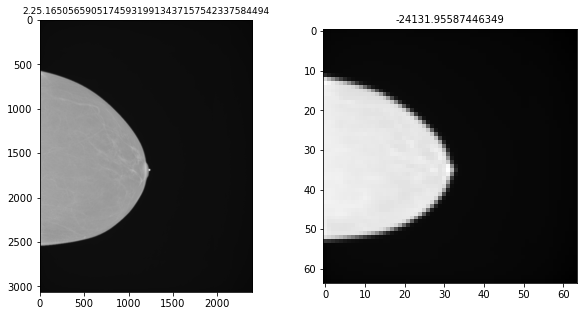

(64, 64)


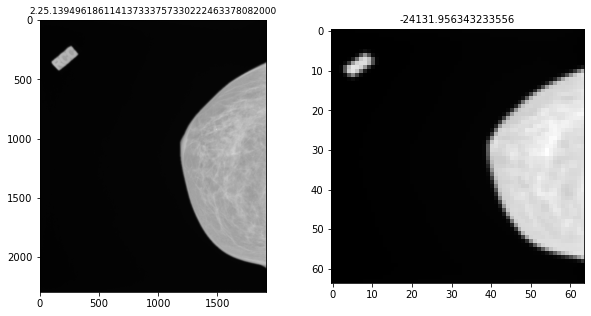

(64, 64)


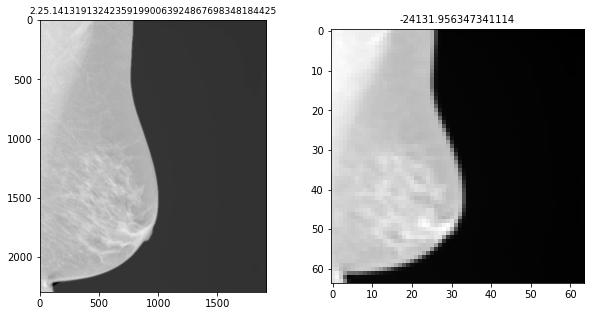

(64, 64)


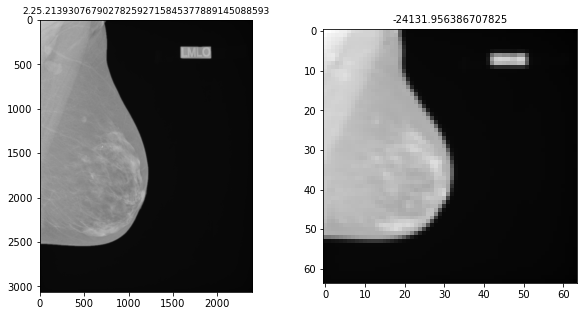

(64, 64)


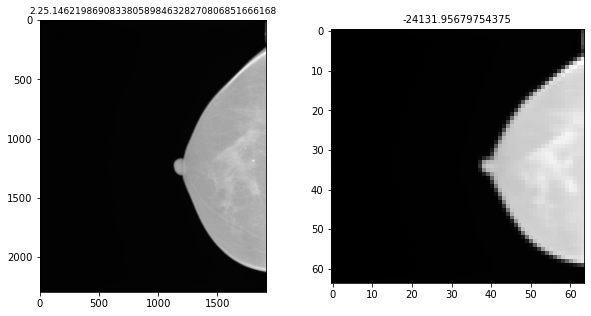

(64, 64)


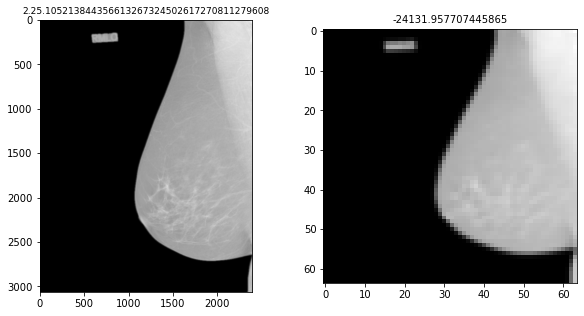

(64, 64)


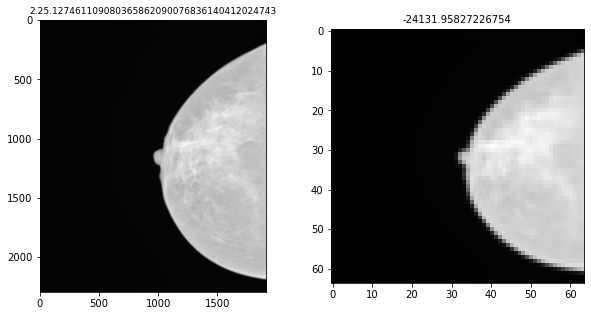

(64, 64)


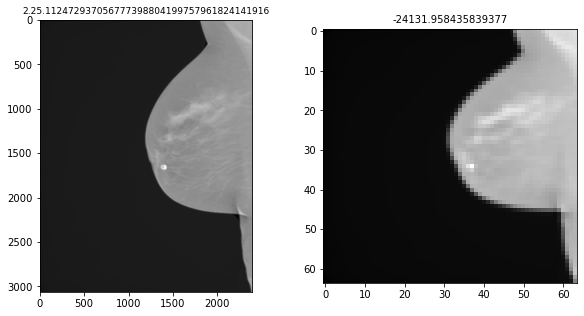

(64, 64)


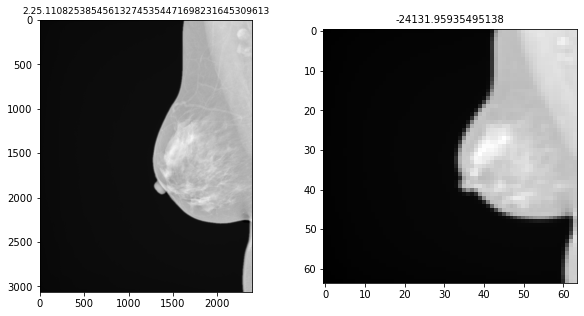

(64, 64)


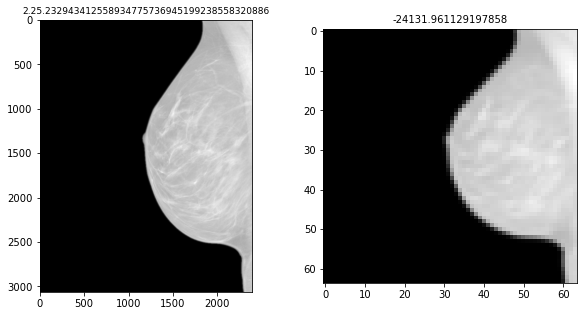

(64, 64)


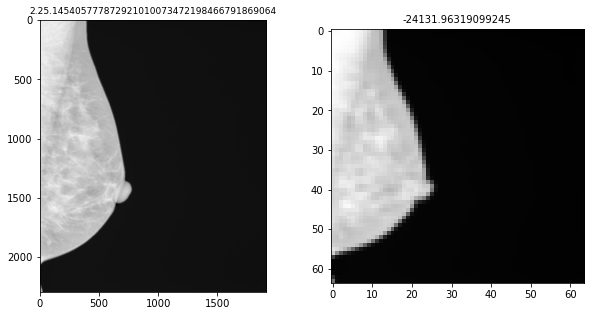

(64, 64)


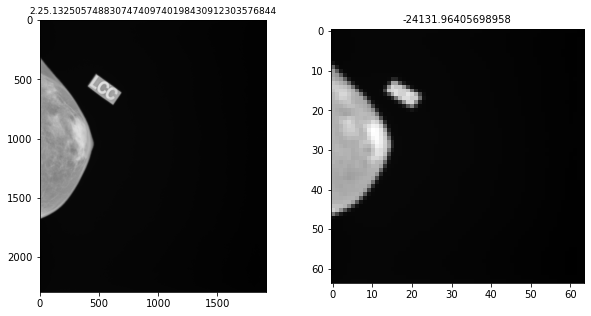

(64, 64)


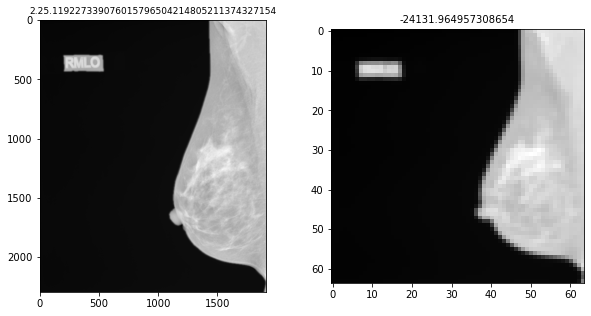

(64, 64)


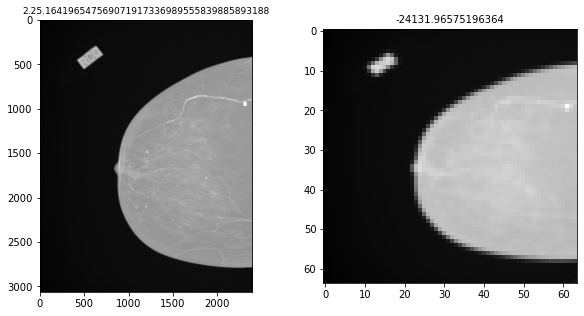

(64, 64)


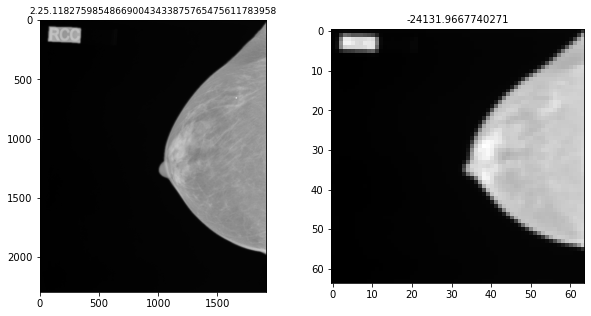

(64, 64)


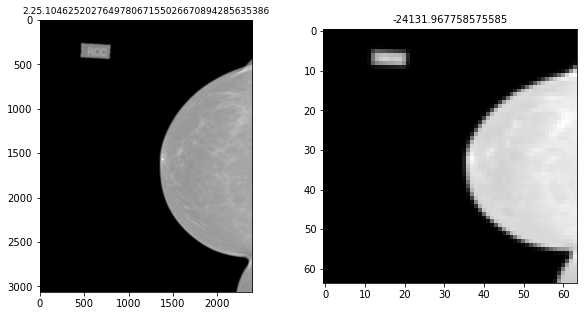

(64, 64)


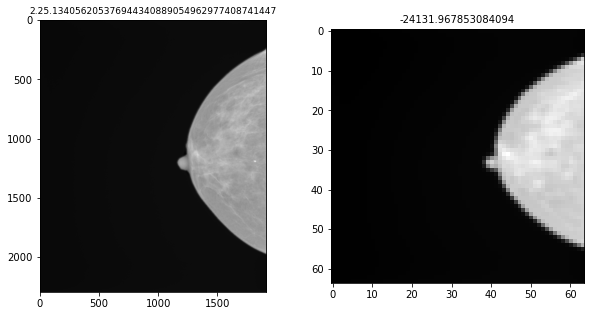

(64, 64)


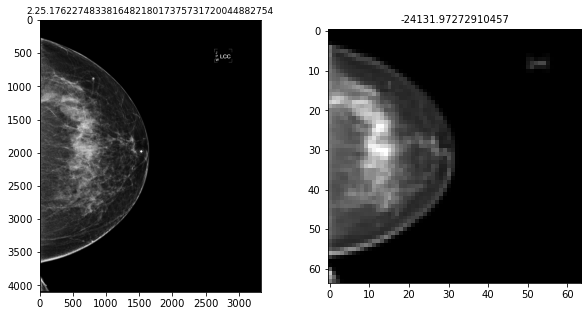

(64, 64)


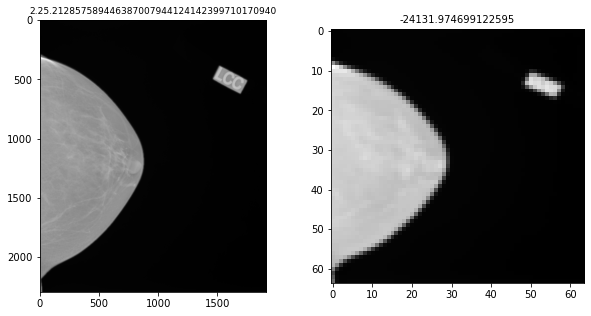

(64, 64)


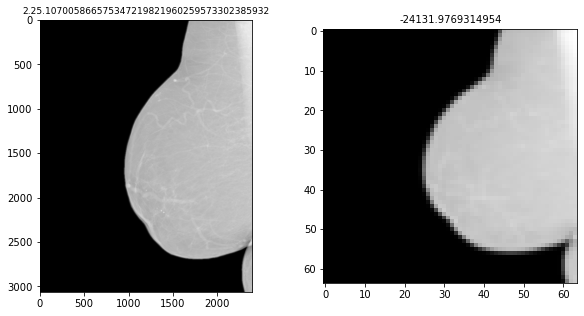

(64, 64)


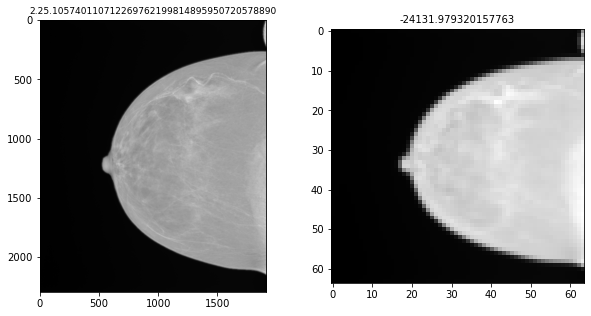

(64, 64)


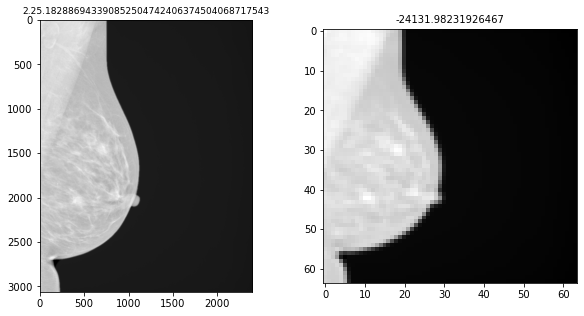

(64, 64)


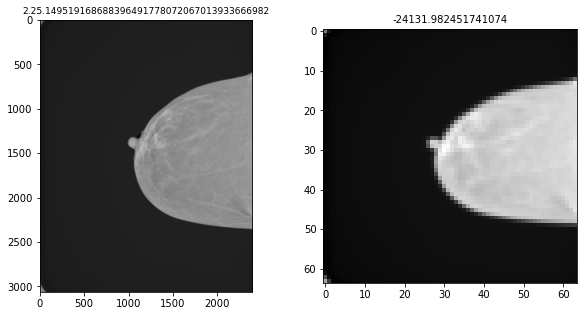

(64, 64)


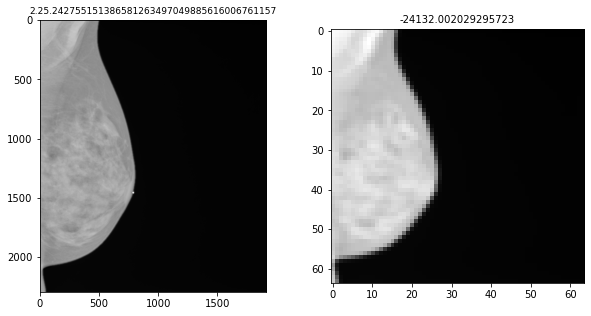

(64, 64)


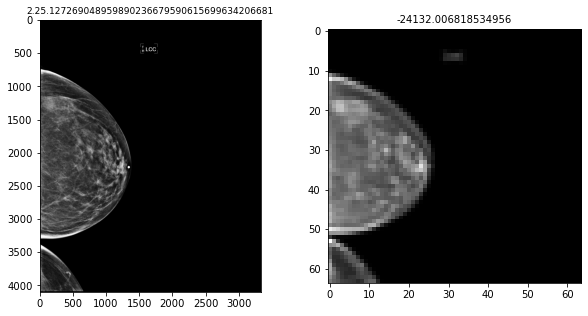

(64, 64)


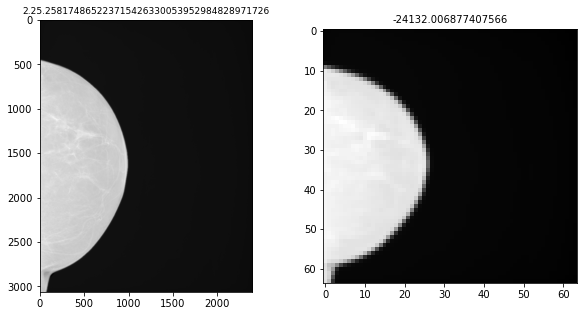

(64, 64)


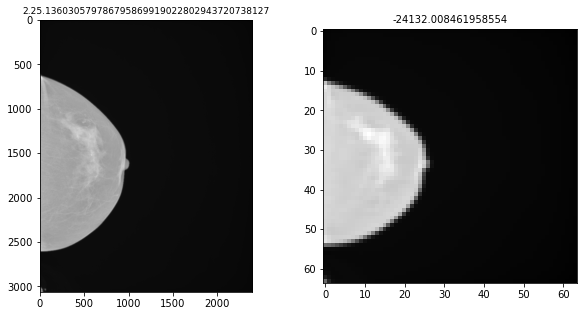

(64, 64)


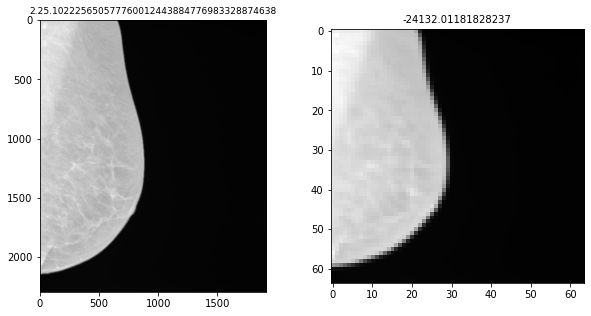

(64, 64)


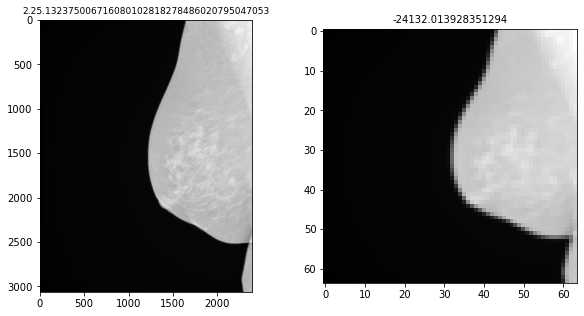

(64, 64)


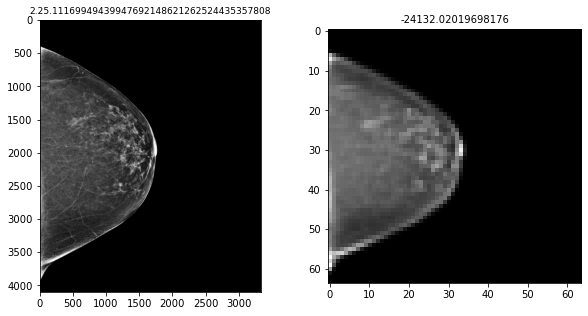

(64, 64)


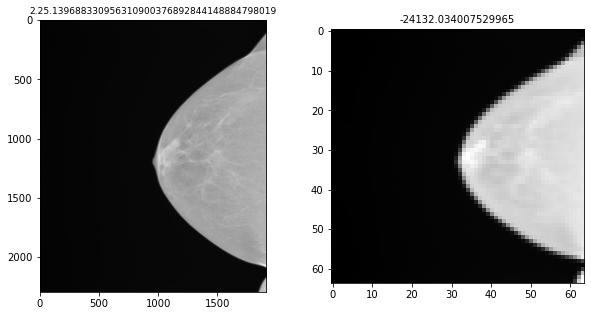

(64, 64)


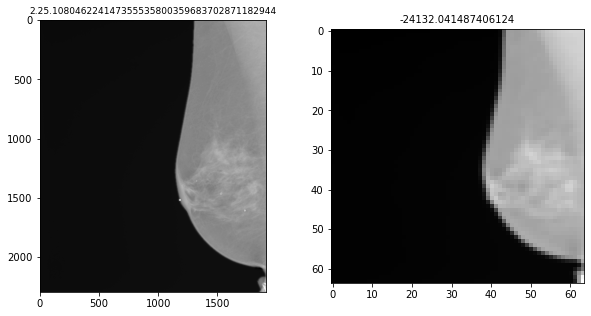

(64, 64)


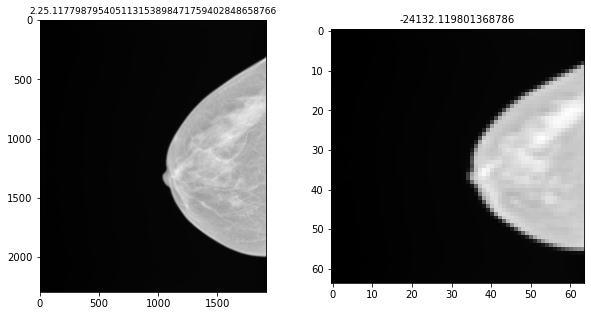

(64, 64)


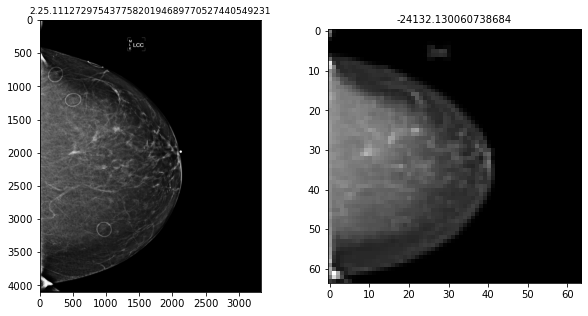

In [3]:
train_scoresX, train_labelsX = O.OutlierDetector.detect_outliers(downsampled_imgs, pyod_algorithm='GMM')
O.Features.view_image_and_features(imgs, ['downsample'], train_scores=[train_scoresX])